<a href="https://colab.research.google.com/github/HarryKodden/JumpCloud-Provisioner/blob/master/Token_Based_Access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install iplantuml

  Created wheel for iplantuml: filename=IPlantUML-0.1.1-py2.py3-none-any.whl size=4912 sha256=04d733b8461adb5d46661efd52d2149fc7b4a5fed87b14be4d37b6d566e00ed2
  Stored in directory: /root/.cache/pip/wheels/cf/64/08/5bac65794ab011a60f7ef62413d3c430cf715345028f4b3914
Successfully built iplantuml


In [3]:
import iplantuml

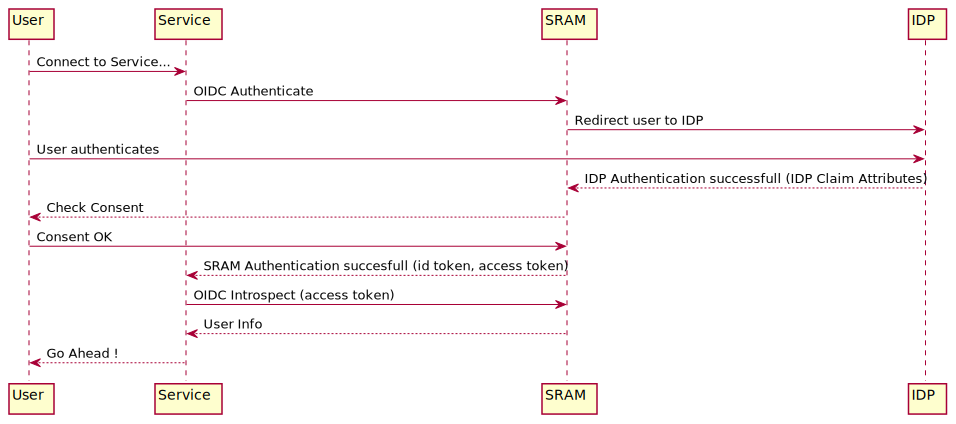

In [5]:
%%plantuml 

@startuml
User -> Service: Connect to Service...
Service -> SRAM: OIDC Authenticate
SRAM -> IDP: Redirect user to IDP
User -> IDP: User authenticates
IDP --> SRAM: IDP Authentication successfull (IDP Claim Attributes)
SRAM --> User: Check Consent
User -> SRAM: Consent OK
SRAM --> Service: SRAM Authentication succesfull (id token, access token)
Service -> SRAM: OIDC Introspect (access token)
SRAM --> Service: User Info
Service --> User: Go Ahead !
@enduml 

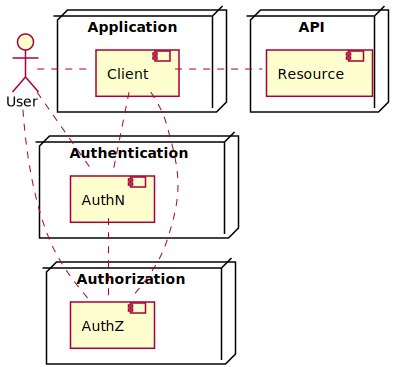

In [6]:
%%plantuml 

@startuml

actor "User"

node "Application" {
  [Client]
}

node "API" {
  [Resource]
}

node "Authentication" {
  [AuthN]
}

node "Authorization" {
  [AuthZ]
}


[User].[Client]
[User]..[AuthN]
[User]..[AuthZ]

[AuthN]..[AuthZ]

[Client]..[AuthN]
[Client]..[AuthZ]
[Client].[Resource]

@enduml

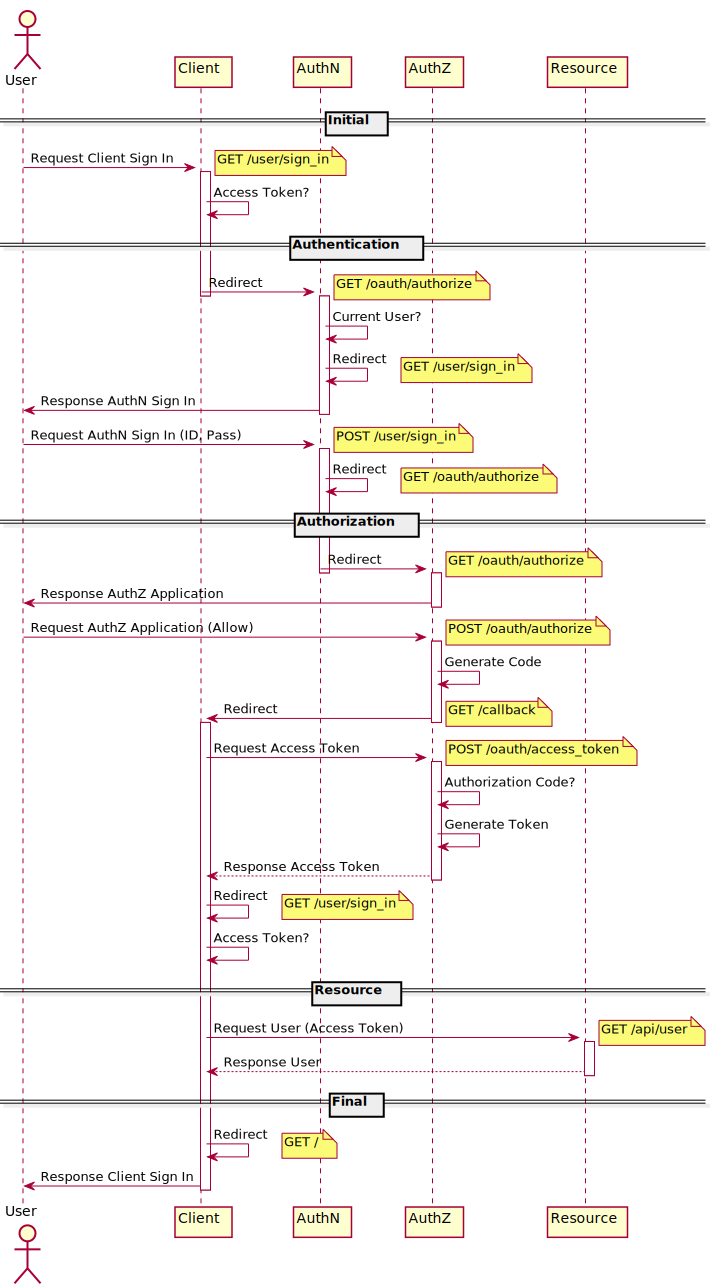

In [7]:
%%plantuml 

@startuml

actor User

== Initial ==

User -> Client : Request Client Sign In
note right : GET /user/sign_in

activate Client
Client -> Client : Access Token?

== Authentication ==

Client -> AuthN : Redirect
note right : GET /oauth/authorize
deactivate Client

activate AuthN
AuthN -> AuthN : Current User?
AuthN -> AuthN : Redirect
note right : GET /user/sign_in
User <- AuthN : Response AuthN Sign In
deactivate AuthN

User -> AuthN : Request AuthN Sign In (ID, Pass)

activate AuthN
note right : POST /user/sign_in
AuthN -> AuthN : Redirect
note right : GET /oauth/authorize

== Authorization ==

AuthN -> AuthZ : Redirect
note right : GET /oauth/authorize
deactivate AuthN

activate AuthZ
User <- AuthZ : Response AuthZ Application
deactivate AuthZ

User -> AuthZ : Request AuthZ Application (Allow)
note right : POST /oauth/authorize

activate AuthZ
AuthZ -> AuthZ : Generate Code

Client <- AuthZ : Redirect
note right : GET /callback
deactivate AuthZ

activate Client
Client -> AuthZ : Request Access Token
note right : POST /oauth/access_token

activate AuthZ
AuthZ -> AuthZ : Authorization Code?
AuthZ -> AuthZ : Generate Token

Client <-- AuthZ : Response Access Token
deactivate AuthZ

Client -> Client : Redirect
note right : GET /user/sign_in

Client -> Client : Access Token?

== Resource ==

Client -> Resource : Request User (Access Token)
note right : GET /api/user

activate Resource
Client <-- Resource : Response User
deactivate Resource

== Final ==

Client -> Client : Redirect
note right : GET /

User <- Client : Response Client Sign In
deactivate Client

@enduml